##### Stock price exploratory data analytics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime
from talib import RSI,EMA,MACD,ADX,CCI,NATR,BBANDS
import seaborn as sns

C:\Users\soumya\AppData\Local\Temp\ipykernel_15672\1233394349.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


C:\Users\soumya\AppData\Local\Temp\ipykernel_15672\2551656994.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


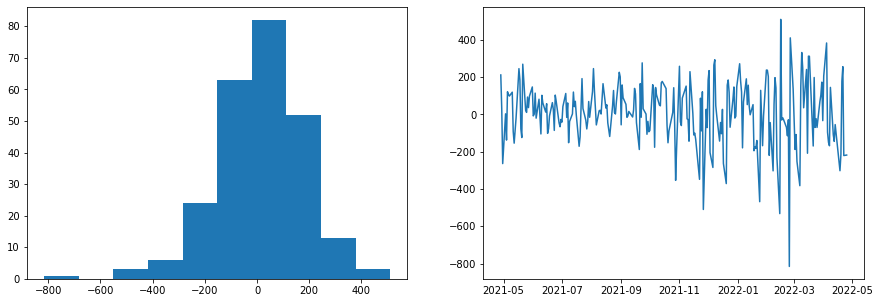

In [3]:
def parser(x):
	return datetime.strptime(x, '%m-%d-%Y')

df = pd.read_csv('data.csv', header=0, parse_dates=[0], date_parser=parser)
df_cleaned = df.dropna()
df_cleaned['Diff'] = df_cleaned.Close.diff()

fig, axs = plt.subplots(1,2,figsize=(15, 5))
axs = axs.ravel()
axs[0].hist(df_cleaned.Diff)
axs[1].plot(df_cleaned.Date,df_cleaned.Diff)
fig.show()

In [4]:
df_cleaned['Close-Open'] = df_cleaned['Close'] - df_cleaned['Open']
df_cleaned['High-Low'] = df_cleaned['High'] - df_cleaned['Low']

df_cleaned['RSI'] = RSI(df_cleaned['Close'], timeperiod=14)
df_cleaned['EMA'] = EMA(df_cleaned['Close'], timeperiod=14)
df_cleaned['Close-EMA'] = df_cleaned['Close'] - df_cleaned['EMA']
macd, macdsignal, macdhist = MACD(df_cleaned['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df_cleaned['MACD'] = macd
df_cleaned['Signal'] = macdsignal
df_cleaned['MACD-Signal'] = macd - macdsignal
df_cleaned['ADX'] = ADX(df_cleaned['High'], df_cleaned['Low'], df_cleaned['Close'], timeperiod=14)
df_cleaned['CCI'] = CCI(df_cleaned['High'], df_cleaned['Low'], df_cleaned['Close'], timeperiod=14)
df_cleaned['NormATR'] = NATR(df_cleaned['High'], df_cleaned['Low'], df_cleaned['Close'], timeperiod=14)
upperband, middleband, lowerband = BBANDS(df_cleaned['Close'], timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
df_cleaned['BBup'] = upperband
df_cleaned['BBmid'] = middleband
df_cleaned['BBlow'] = lowerband
df_cleaned['Close-BBup'] = df_cleaned['Close'] - df_cleaned['BBup']
df_cleaned['Close-BBmid'] = df_cleaned['Close'] - df_cleaned['BBmid']
df_cleaned['Close-BBlow'] = df_cleaned['Close'] - df_cleaned['BBlow']
df_cleaned['Diff_t+1'] = df_cleaned['Diff'].shift(periods=-1)

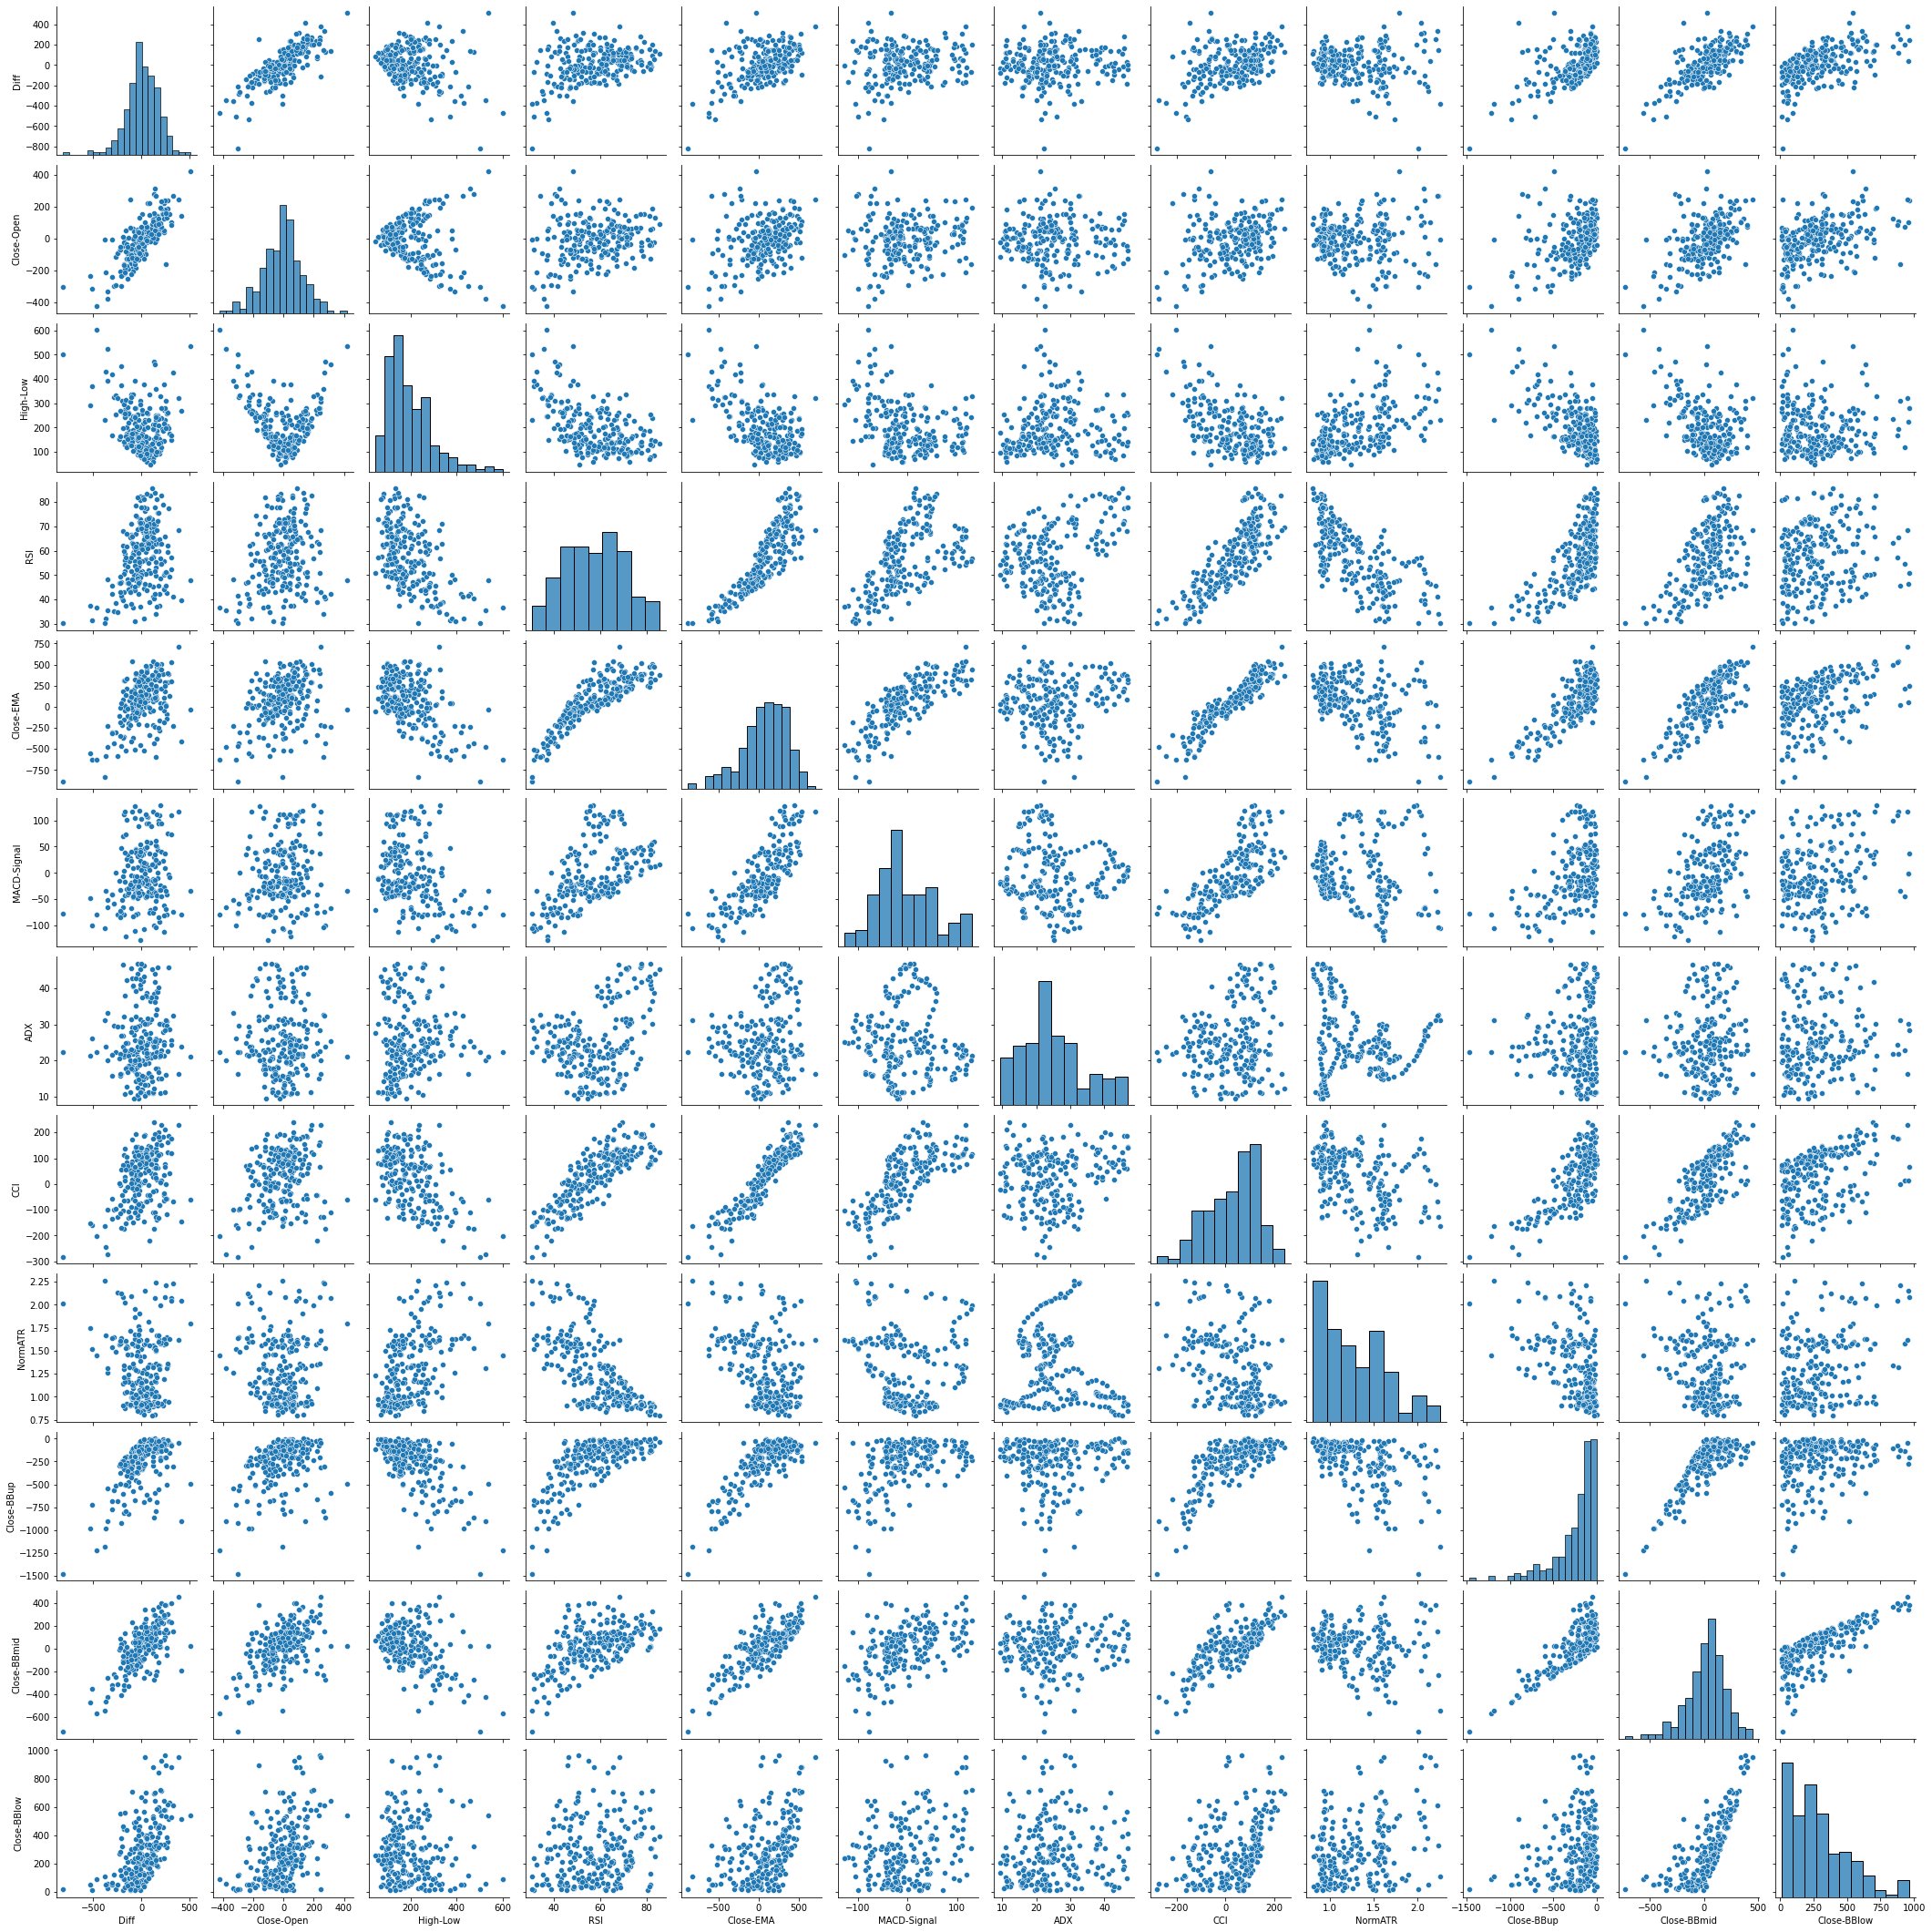

In [5]:
sns.pairplot(df_cleaned[['Diff','Close-Open','High-Low','RSI','Close-EMA','MACD-Signal','ADX','CCI','NormATR','Close-BBup','Close-BBmid','Close-BBlow']])

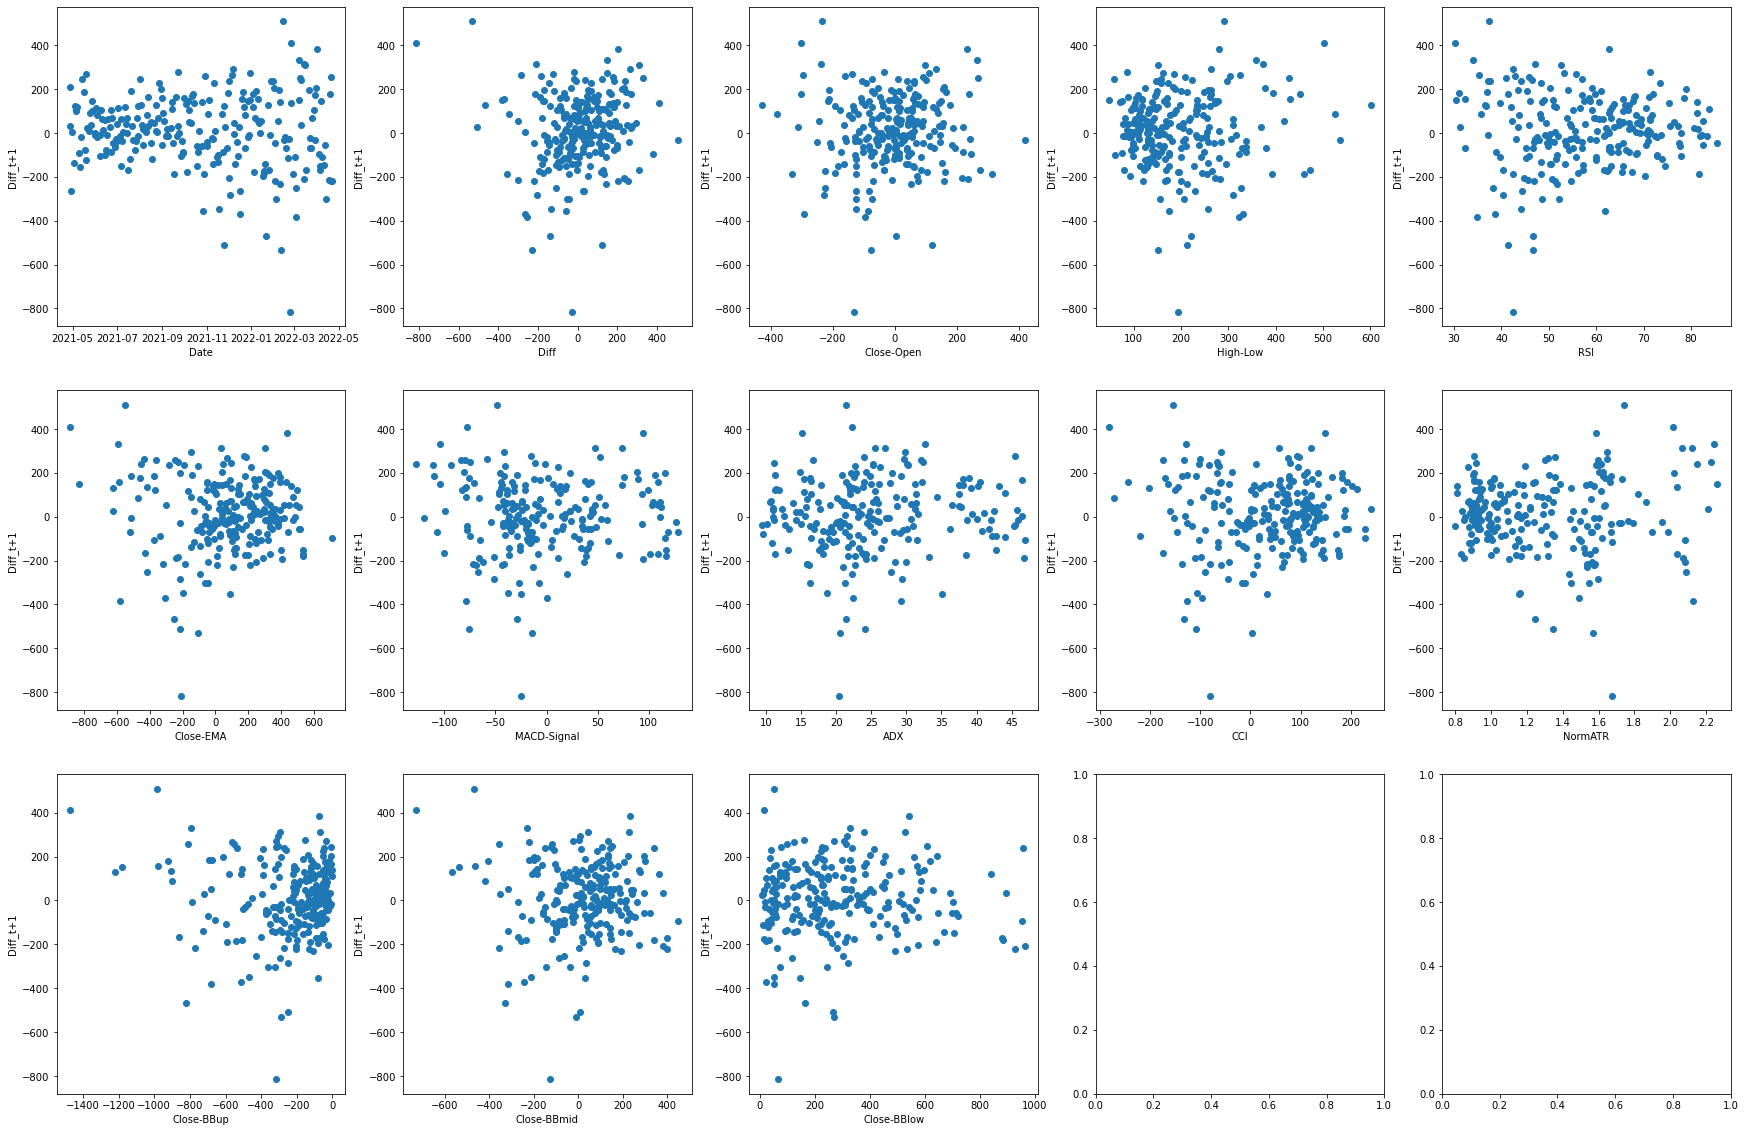

In [6]:
df_model = df_cleaned[['Date','Diff','Close-Open','High-Low','RSI','Close-EMA','MACD-Signal','ADX','CCI','NormATR','Close-BBup','Close-BBmid','Close-BBlow','Diff_t+1']]
fig, axs = plt.subplots(3, 5, figsize=(30,20), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(df_model.shape[1]-1):
    axs[i].set_ylabel("Diff_t+1")
    axs[i].set_xlabel(df_model.columns[i])
    axs[i].scatter(df_model.iloc[:,i],df_model.iloc[:,-1])

In [7]:
df_model.to_csv('data_model.csv', index=False)